In [1]:
Nocturnal UHI Magnitude


SyntaxError: invalid syntax (2015288389.py, line 1)

In [2]:
import os
import sys
import pandas as pd
import geopandas as gpd
from tqdm import tqdm
import pandas as pd
from tqdm import tqdm
import numpy as np
from scipy.stats import pearsonr, spearmanr
from datetime import datetime
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from importlib import reload
import matplotlib.pyplot as plt
import os
import sys
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import calplot
sys.path.append("../../src")
import main
year = 'year'
var = 'BuAre_sum'
radius = 300
temp = pd.read_csv('/Users/lisawink/Documents/paper1/data/processed_data/temp_synoptic_controls.csv')
stats_dict = pd.read_csv(f'/Users/lisawink/Documents/paper1/data/processed_data/diurnal/all_year/{year,var,radius}.csv') 
stats_dict['Time'] = pd.to_datetime(stats_dict['Time'])

date_to_fraction_of_day = temp.set_index('datetime_UTC')['fraction_of_day'].to_dict()
day_to_fraction_of_night = temp.set_index('datetime_UTC')['fraction_of_night'].to_dict()
stats_dict['fraction_of_day'] = stats_dict['Time'].astype(str).map(date_to_fraction_of_day)
stats_dict['fraction_of_night'] = stats_dict['Time'].astype(str).map(day_to_fraction_of_night)

In [3]:
stats_dict['night_frac'] = stats_dict['fraction_of_night'].round(1)

In [4]:
stats_dict

,Unnamed: 0,Parameter,Parameter.1,Pearson Correlation,Pearson p-value,Spearman Correlation,Spearman p-value,Mutual Information,Temp. Std. Dev.,UHI Magnitude,Time,fraction_of_day,fraction_of_night,night_frac
0,2022-09-01 00:00:00+00:00,BuAre_sum,BuAre_sum,0.728246,3.242233e-07,0.737479,1.921603e-07,0.291775,1.186516,3.18,2022-09-01 00:00:00+00:00,0.000000,0.545502,0.5
1,2022-09-01 01:00:00+00:00,BuAre_sum,BuAre_sum,0.797251,3.516799e-09,0.781861,1.108173e-08,0.283435,1.198343,3.44,2022-09-01 01:00:00+00:00,0.000000,0.640301,0.6
2,2022-09-01 02:00:00+00:00,BuAre_sum,BuAre_sum,0.790463,5.903210e-09,0.799715,2.899823e-09,0.303952,1.179618,3.35,2022-09-01 02:00:00+00:00,0.000000,0.735100,0.7
3,2022-09-01 03:00:00+00:00,BuAre_sum,BuAre_sum,0.816251,7.392775e-10,0.789779,6.212655e-09,0.414044,1.159119,3.30,2022-09-01 03:00:00+00:00,0.000000,0.829898,0.8
4,2022-09-01 04:00:00+00:00,BuAre_sum,BuAre_sum,0.842145,6.447970e-11,0.838530,9.296167e-11,0.526724,0.957783,2.43,2022-09-01 04:00:00+00:00,0.000000,0.924697,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8762,2023-09-01 02:00:00+00:00,BuAre_sum,BuAre_sum,0.655042,1.086764e-05,0.705973,1.054780e-06,0.374457,0.278165,0.58,2023-09-01 02:00:00+00:00,0.000000,0.735294,0.7
8763,2023-09-01 03:00:00+00:00,BuAre_sum,BuAre_sum,0.563668,2.803351e-04,0.568582,2.410923e-04,0.148166,0.326773,0.63,2023-09-01 03:00:00+00:00,0.000000,0.830223,0.8
8764,2023-09-01 04:00:00+00:00,BuAre_sum,BuAre_sum,0.516030,1.078576e-03,0.563832,2.789370e-04,0.275508,0.532074,0.47,2023-09-01 04:00:00+00:00,0.000000,0.925153,0.9
8765,2023-09-01 05:00:00+00:00,BuAre_sum,BuAre_sum,0.359240,2.898804e-02,0.275772,9.851539e-02,0.013448,0.838444,0.15,2023-09-01 05:00:00+00:00,0.015748,1.020082,1.0


In [5]:
stats_dict['Date'] = stats_dict['Unnamed: 0'].dt.date

AttributeError: Can only use .dt accessor with datetimelike values

In [91]:
# normalise columns between 0 and 1 for each day
stats_dict['Spearman Correlation_norm'] = stats_dict.groupby('Date')['Spearman Correlation'].transform(lambda x: (x - x.min()) / (x.max() - x.min()))
stats_dict['Temp. Std. Dev._norm'] = stats_dict.groupby('Date')['Temp. Std. Dev.'].transform(lambda x: (x - x.min()) / (x.max() - x.min()))
stats_dict['UHI Magnitude_norm'] = stats_dict.groupby('Date')['UHI Magnitude'].transform(lambda x: (x - x.min()) / (x.max() - x.min()))

In [92]:
stats_dict

,Unnamed: 0,Parameter,Parameter.1,Pearson Correlation,Pearson p-value,Spearman Correlation,Spearman p-value,Mutual Information,Temp. Std. Dev.,UHI Magnitude,Time,fraction_of_day,fraction_of_night,night_frac,Date,Spearman Correlation_norm,Temp. Std. Dev._norm,UHI Magnitude_norm
0,2022-09-01 00:00:00+00:00,BuAre_sum,BuAre_sum,0.728246,3.242233e-07,0.737479,1.921603e-07,0.291775,1.186516,3.18,2022-09-01 00:00:00+00:00,0.000000,0.545502,0.5,2022-09-01,0.879728,0.675053,0.943355
1,2022-09-01 01:00:00+00:00,BuAre_sum,BuAre_sum,0.797251,3.516799e-09,0.781861,1.108173e-08,0.283435,1.198343,3.44,2022-09-01 01:00:00+00:00,0.000000,0.640301,0.6,2022-09-01,0.932553,0.697867,1.000000
2,2022-09-01 02:00:00+00:00,BuAre_sum,BuAre_sum,0.790463,5.903210e-09,0.799715,2.899823e-09,0.303952,1.179618,3.35,2022-09-01 02:00:00+00:00,0.000000,0.735100,0.7,2022-09-01,0.953803,0.661747,0.980392
3,2022-09-01 03:00:00+00:00,BuAre_sum,BuAre_sum,0.816251,7.392775e-10,0.789779,6.212655e-09,0.414044,1.159119,3.30,2022-09-01 03:00:00+00:00,0.000000,0.829898,0.8,2022-09-01,0.941977,0.622203,0.969499
4,2022-09-01 04:00:00+00:00,BuAre_sum,BuAre_sum,0.842145,6.447970e-11,0.838530,9.296167e-11,0.526724,0.957783,2.43,2022-09-01 04:00:00+00:00,0.000000,0.924697,0.9,2022-09-01,1.000000,0.233817,0.779956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8762,2023-09-01 02:00:00+00:00,BuAre_sum,BuAre_sum,0.655042,1.086764e-05,0.705973,1.054780e-06,0.374457,0.278165,0.58,2023-09-01 02:00:00+00:00,0.000000,0.735294,0.7,2023-09-01,0.941493,0.015711,0.923077
8763,2023-09-01 03:00:00+00:00,BuAre_sum,BuAre_sum,0.563668,2.803351e-04,0.568582,2.410923e-04,0.148166,0.326773,0.63,2023-09-01 03:00:00+00:00,0.000000,0.830223,0.8,2023-09-01,0.662719,0.101104,1.000000
8764,2023-09-01 04:00:00+00:00,BuAre_sum,BuAre_sum,0.516030,1.078576e-03,0.563832,2.789370e-04,0.275508,0.532074,0.47,2023-09-01 04:00:00+00:00,0.000000,0.925153,0.9,2023-09-01,0.653081,0.461773,0.753846
8765,2023-09-01 05:00:00+00:00,BuAre_sum,BuAre_sum,0.359240,2.898804e-02,0.275772,9.851539e-02,0.013448,0.838444,0.15,2023-09-01 05:00:00+00:00,0.015748,1.020082,1.0,2023-09-01,0.068591,1.000000,0.261538


(0.0, 1.0)

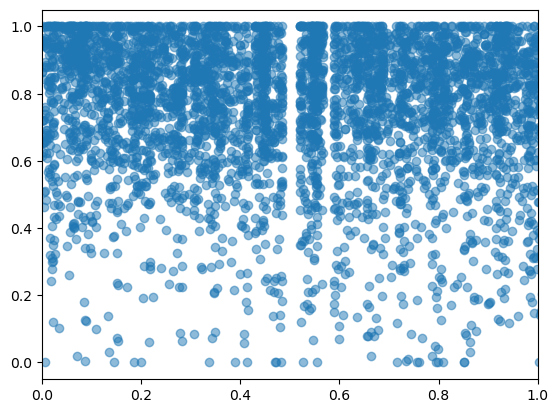

In [93]:
plt.scatter(stats_dict['fraction_of_night'],stats_dict['Spearman Correlation_norm'], label='Spearman Correlation',alpha=0.5)
plt.xlim(0,1)

(0.0, 1.0)

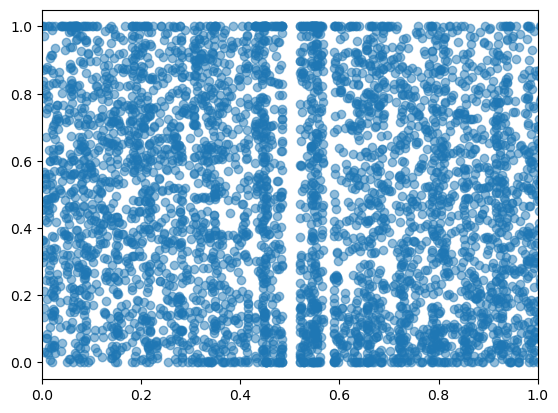

In [94]:
plt.scatter(stats_dict['fraction_of_night'],stats_dict['Temp. Std. Dev._norm'], label='Spearman Correlation',alpha=0.5)
plt.xlim(0,1)

In [95]:
reduced = stats_dict[['night_frac', 'Spearman Correlation_norm', 'Temp. Std. Dev._norm', 'UHI Magnitude_norm']].groupby('night_frac').mean()

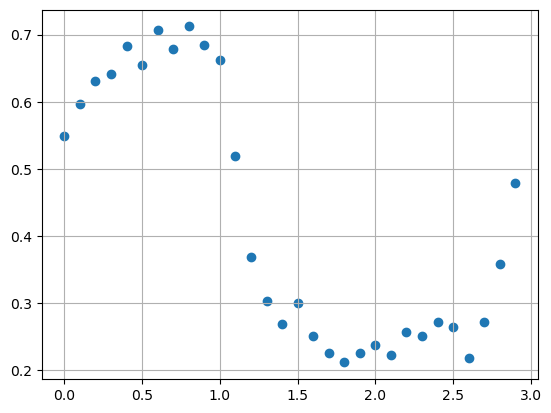

In [96]:
plt.scatter(reduced.index, reduced['UHI Magnitude_norm'], marker='o', label='UHI Magnitude')
plt.grid()

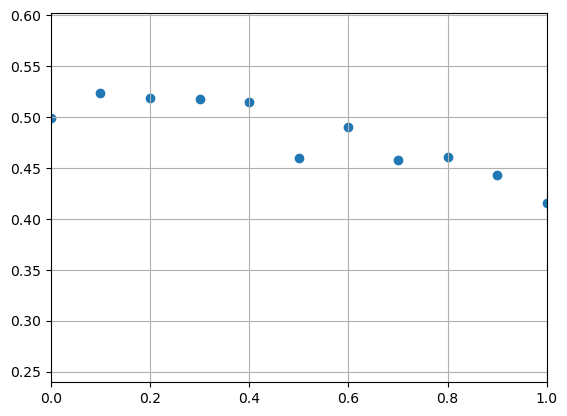

In [97]:
plt.scatter(reduced.index, reduced['Temp. Std. Dev._norm'], marker='o', label='UHI Magnitude')
plt.xlim(0,1)
plt.grid()

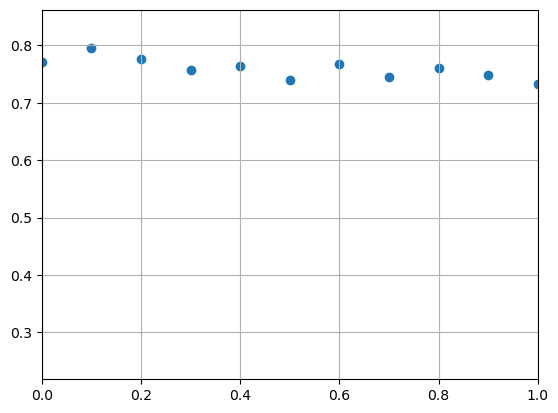

In [98]:
plt.scatter(reduced.index, reduced['Spearman Correlation_norm'], marker='o', label='UHI Magnitude')
plt.xlim(0,1)
plt.grid()

In [13]:
red = stats_dict[['Temp. Std. Dev.','UHI Magnitude','night_frac']].groupby('night_frac').mean()

In [14]:
red

,Temp. Std. Dev.,UHI Magnitude
night_frac,,
0.00,0.774387,1.064737
0.01,0.831593,1.125000
0.02,0.708737,1.267031
0.03,0.998462,1.545556
0.04,0.865204,1.606786
...,...,...
2.91,1.324354,1.975000
2.92,1.157654,0.860000
2.93,1.006450,1.191667


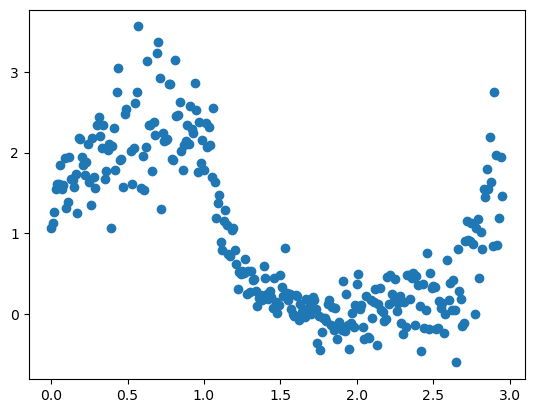

In [16]:
plt.scatter(red.index, red['UHI Magnitude'], marker='o', label='UHI Magnitude')

Text(0, 0.5, 'Standard Deviation of Temperature (K)')

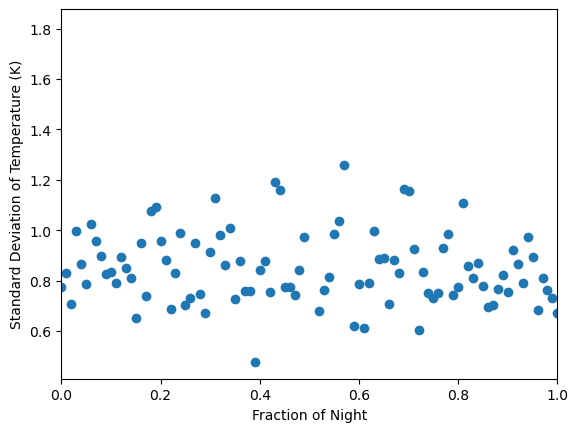

In [19]:
plt.scatter(red.index, red['Temp. Std. Dev.'], marker='o', label='UHI Magnitude')
plt.xlim(0, 1)
plt.xlabel('Fraction of Night')
plt.ylabel('Standard Deviation of Temperature (K)')

(0.0, 1.0)

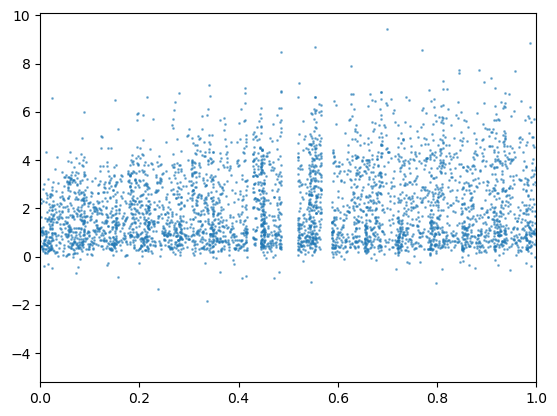

In [6]:
plt.plot(stats_dict['fraction_of_night'], stats_dict['UHI Magnitude'], 'o', markersize=1, alpha=0.5)
plt.xlim(0, 1)

(0.0, 1.0)

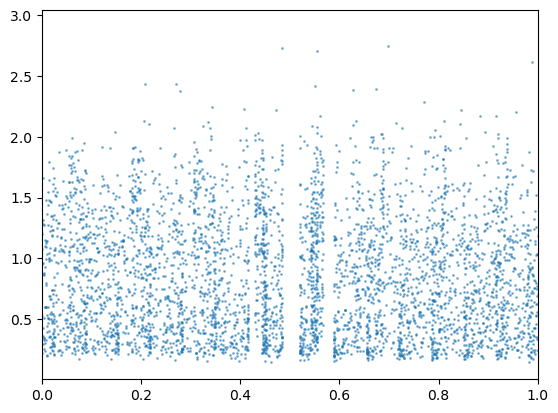

In [7]:
plt.plot(stats_dict['fraction_of_night'], stats_dict['Temp. Std. Dev.'], 'o', markersize=1, alpha=0.5)
plt.xlim(0, 1)

In [68]:
grouped= stats_dict[['Spearman Correlation','Temp. Std. Dev.','UHI Magnitude','night_frac']].groupby('night_frac').mean()

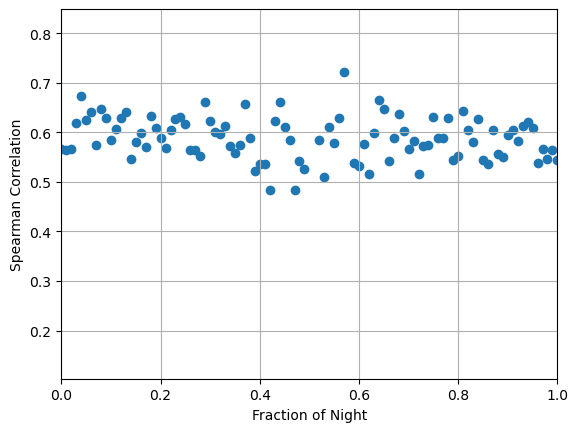

In [70]:
plt.scatter(grouped.index, grouped['Spearman Correlation'], marker='o', label='UHI Magnitude')
plt.xlim(0, 1)
plt.xlabel('Fraction of Night')
plt.ylabel('Spearman Correlation')
plt.grid()

In [21]:
hin = pd.read_csv('/Users/lisawink/Documents/paper1/data/hin.csv', index_col=0)

In [23]:
hin['date'] = pd.to_datetime(hin['heat_island_nights']).dt.date

In [26]:
hin['date'].unique()

array([datetime.date(2022, 10, 5), datetime.date(2022, 10, 6),
       datetime.date(2022, 10, 17), datetime.date(2022, 10, 27),
       datetime.date(2022, 10, 28), datetime.date(2022, 10, 29),
       datetime.date(2022, 10, 30), datetime.date(2022, 10, 31),
       datetime.date(2022, 11, 8), datetime.date(2023, 1, 1),
       datetime.date(2023, 2, 21), datetime.date(2023, 3, 16),
       datetime.date(2023, 5, 25), datetime.date(2023, 5, 28),
       datetime.date(2023, 6, 1), datetime.date(2023, 6, 13),
       datetime.date(2023, 6, 14), datetime.date(2023, 6, 17),
       datetime.date(2023, 6, 18), datetime.date(2023, 6, 26),
       datetime.date(2023, 7, 7), datetime.date(2023, 7, 22),
       datetime.date(2023, 7, 23), datetime.date(2023, 8, 18)],
      dtype=object)

In [27]:
hin

,heat_island_nights,date
0,2022-10-05 03:00:00+00:00,2022-10-05
1,2022-10-05 04:00:00+00:00,2022-10-05
2,2022-10-06 00:00:00+00:00,2022-10-06
3,2022-10-06 01:00:00+00:00,2022-10-06
4,2022-10-06 02:00:00+00:00,2022-10-06
...,...,...
81,2023-07-23 01:00:00+00:00,2023-07-23
82,2023-07-23 02:00:00+00:00,2023-07-23
83,2023-07-23 04:00:00+00:00,2023-07-23
84,2023-08-18 22:00:00+00:00,2023-08-18


In [32]:
stats_dict['Unnamed: 0'] = pd.to_datetime(stats_dict['Unnamed: 0'])

In [49]:
red1 = stats_dict[stats_dict['Unnamed: 0'].dt.date.isin(hin['date'])]

In [50]:
red1

,Unnamed: 0,Parameter,Parameter.1,Pearson Correlation,Pearson p-value,Spearman Correlation,Spearman p-value,Mutual Information,Temp. Std. Dev.,UHI Magnitude,Time,fraction_of_day,fraction_of_night,night_frac,Date
816,2022-10-05 00:00:00+00:00,BuAre_sum,BuAre_sum,0.609385,6.251575e-05,0.582775,1.538540e-04,0.162366,1.296091,4.92,2022-10-05 00:00:00+00:00,0.0,0.554309,0.55,2022-10-05
817,2022-10-05 01:00:00+00:00,BuAre_sum,BuAre_sum,0.578661,1.756239e-04,0.508595,1.308186e-03,0.152399,1.285660,5.21,2022-10-05 01:00:00+00:00,0.0,0.634348,0.63,2022-10-05
818,2022-10-05 02:00:00+00:00,BuAre_sum,BuAre_sum,0.643142,1.762538e-05,0.572411,2.140109e-04,0.219159,1.349732,5.60,2022-10-05 02:00:00+00:00,0.0,0.714388,0.71,2022-10-05
819,2022-10-05 03:00:00+00:00,BuAre_sum,BuAre_sum,0.541759,5.340573e-04,0.436937,6.851633e-03,0.000000,1.731292,6.54,2022-10-05 03:00:00+00:00,0.0,0.794428,0.79,2022-10-05
820,2022-10-05 04:00:00+00:00,BuAre_sum,BuAre_sum,0.568270,2.434301e-04,0.500178,1.619272e-03,0.195897,1.484924,5.13,2022-10-05 04:00:00+00:00,0.0,0.874467,0.87,2022-10-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8443,2023-08-18 19:00:00+00:00,BuAre_sum,BuAre_sum,0.689781,2.329094e-06,0.743050,1.386694e-07,0.467453,1.878995,4.12,2023-08-18 19:00:00+00:00,0.0,0.034360,0.03,2023-08-18
8444,2023-08-18 20:00:00+00:00,BuAre_sum,BuAre_sum,0.628851,3.067678e-05,0.627074,3.280204e-05,0.221765,1.909117,4.51,2023-08-18 20:00:00+00:00,0.0,0.136653,0.14,2023-08-18
8445,2023-08-18 21:00:00+00:00,BuAre_sum,BuAre_sum,0.627536,3.223768e-05,0.627549,3.222224e-05,0.224763,1.910860,4.17,2023-08-18 21:00:00+00:00,0.0,0.238946,0.24,2023-08-18
8446,2023-08-18 22:00:00+00:00,BuAre_sum,BuAre_sum,0.677938,4.029385e-06,0.699307,1.470700e-06,0.240805,2.008987,4.75,2023-08-18 22:00:00+00:00,0.0,0.341239,0.34,2023-08-18


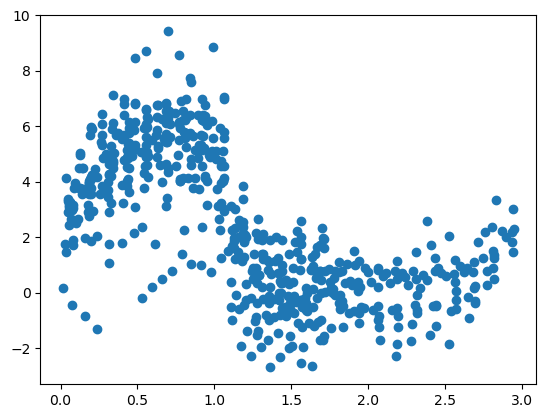

In [52]:
plt.scatter(red1['fraction_of_night'], red1['UHI Magnitude'], marker='o', label='UHI Magnitude')

(0.0, 1.0)

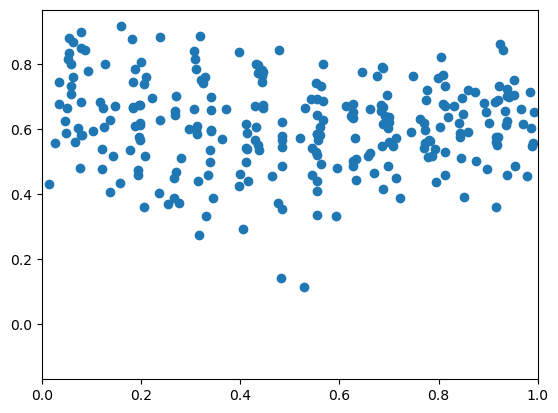

In [58]:
plt.scatter(red1['fraction_of_night'], red1['Spearman Correlation'], marker='o', label='UHI Magnitude')
plt.xlim(0, 1)

816    1.000000
817    0.864143
818    0.981018
819    0.732905
820    0.848728
821    0.821916
822    0.761443
823    0.276842
824    0.293932
825    0.229289
826    0.412496
827    0.383213
828    0.111373
829    0.122858
830    0.000000
831    0.259688
832    0.502631
833    0.899260
834    0.812902
835    0.728271
836    0.669078
837    0.431385
838    0.709459
839    0.613541
Name: Spearman Correlation, dtype: float64
840    0.433426
841    0.470902
842    0.479186
843    0.577698
844    0.775744
845    0.816101
846    0.780994
847    0.743656
848    0.832605
849    0.408953
850    0.084897
851    0.079738
852    0.044362
853    0.000000
854    0.164317
855    0.338478
856    0.514433
857    0.980313
858    0.981724
859    1.000000
860    0.965361
861    0.968349
862    0.911877
863    0.918895
Name: Spearman Correlation, dtype: float64
1104    0.795235
1105    0.867960
1106    0.835751
1107    0.856277
1108    0.894386
1109    0.926761
1110    1.000000
1111    0.754132
1112    0.

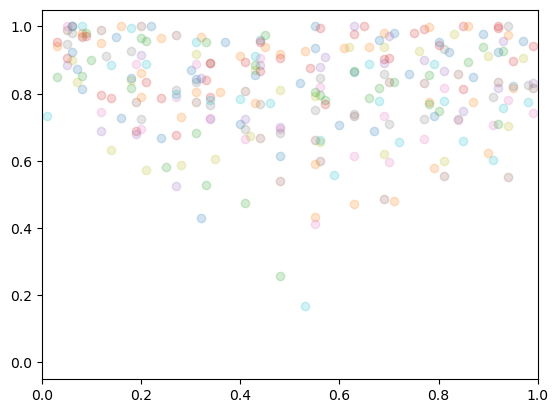

In [56]:
for i in red1['Date'].unique():
    subset = red1.loc[red1['Date'] == i]
    norm = (subset['Spearman Correlation'] - subset['Spearman Correlation'].min()) / (subset['Spearman Correlation'].max() - subset['Spearman Correlation'].min())
    print(norm)
    plt.scatter(subset['night_frac'], norm, label=i,alpha=0.2)
    plt.xlim(0, 1)

816    0.417633
817    0.407835
818    0.468019
819    0.826430
820    0.595009
821    0.777438
822    0.960188
823    0.814690
824    1.000000
825    0.427139
826    0.282730
827    0.113831
828    0.000000
829    0.075714
830    0.183450
831    0.332882
832    0.690574
833    0.719394
834    0.446384
835    0.703314
836    0.715580
837    0.903390
838    0.842652
839    0.827524
Name: Temp. Std. Dev., dtype: float64
840    0.946437
841    1.000000
842    0.991034
843    0.959737
844    0.562034
845    0.364036
846    0.293159
847    0.183253
848    0.019260
849    0.000000
850    0.056955
851    0.286313
852    0.352902
853    0.368214
854    0.314573
855    0.148220
856    0.033214
857    0.105662
858    0.173365
859    0.169316
860    0.162227
861    0.187413
862    0.193081
863    0.197474
Name: Temp. Std. Dev., dtype: float64
1104    0.899381
1105    0.918110
1106    0.904477
1107    1.000000
1108    0.530641
1109    0.505256
1110    0.383666
1111    0.036857
1112    0.410377
111

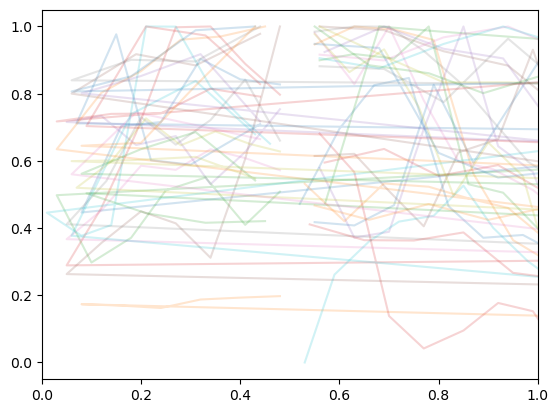

In [51]:
for i in red1['Date'].unique():
    subset = red1.loc[red1['Date'] == i]
    norm = (subset['Temp. Std. Dev.'] - subset['Temp. Std. Dev.'].min()) / (subset['Temp. Std. Dev.'].max() - subset['Temp. Std. Dev.'].min())
    print(norm)
    plt.plot(subset['night_frac'], norm, label=i,alpha=0.2)
    plt.xlim(0, 1)

In [59]:
red2 = red1[['Spearman Correlation','Temp. Std. Dev.','UHI Magnitude','night_frac']].groupby('night_frac').mean()

Text(0, 0.5, 'Standard Deviation of Temperature (K)')

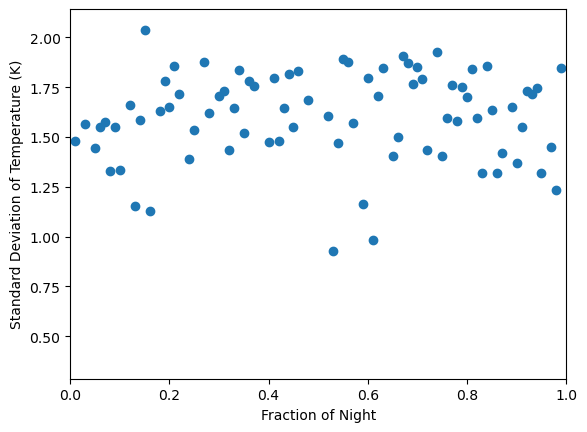

In [63]:
plt.scatter(red2.index, red2['Temp. Std. Dev.'], marker='o', label='UHI Magnitude')
plt.xlim(0, 1)
plt.xlabel('Fraction of Night')
plt.ylabel('Standard Deviation of Temperature (K)')

Text(0, 0.5, 'FRKART- FRHOCH (K)')

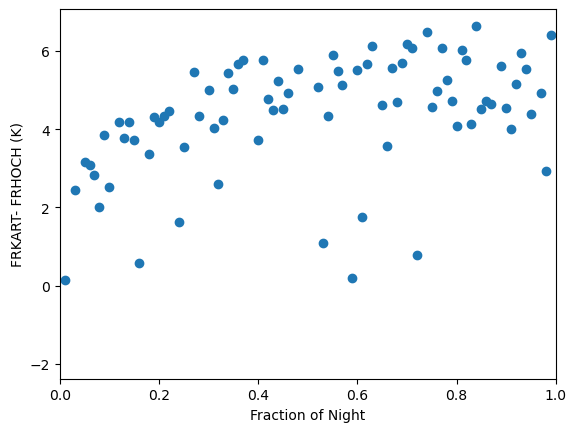

In [64]:
plt.scatter(red2.index, red2['UHI Magnitude'], marker='o', label='UHI Magnitude')
plt.xlim(0, 1)
plt.xlabel('Fraction of Night')
plt.ylabel('FRKART- FRHOCH (K)')

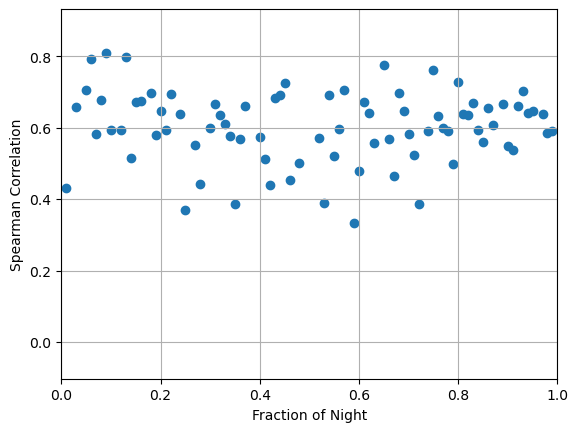

In [67]:
plt.scatter(red2.index, red2['Spearman Correlation'], marker='o', label='UHI Magnitude')
plt.xlim(0, 1)
plt.xlabel('Fraction of Night')
plt.ylabel('Spearman Correlation')
plt.grid()